In [1]:
#import useful files
import statistics as stat
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#file path with glob
path = "Correlation_data/"
all_files = glob.glob(path + "*.csv")

#turn all 512 files into lists
var = [pd.read_csv(filename,index_col=None,header=0,skiprows=17) for filename in all_files]

#concat all lists and turn into 1 big dataframe
dataframe = pd.concat(var,axis=0,ignore_index=True)

#renaming the headers (they came as Channel 1,2,3,4 - need to know what they represent)
rename = ['Time','Excitation_Pulse','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Return_532nm']
dataframe.columns = rename

#change the data type
Clean_dataframe = dataframe.astype(float)

uniform_dataframe=Clean_dataframe.assign(Time = Clean_dataframe['Time']*1e9)

#Setting the Time as the index column
uniform_dataframe.set_index("Time",drop=True,inplace=True)

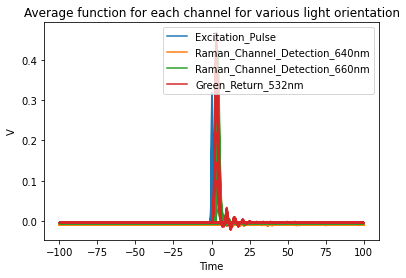

In [3]:
#Plot all columns against Time
plot_columns = ['Excitation_Pulse','Raman_Channel_Detection_640nm','Raman_Channel_Detection_660nm','Green_Return_532nm']
uniform_dataframe[plot_columns].plot()

plt.xlabel('Time')
plt.ylabel('V')
plt.title('Average function for each channel for various light orientation')
plt.show()

### Splitting dataframe with a focus on correlation between peaks

In [4]:
#Split the large dataframe into 512 smaller dataframes
def split_dataframe_by_position(df, splits):
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(uniform_dataframe, 8)
#Test if our split is working
print('Quick test, the max value of the first dataframe = ',split_dataframes[0].Excitation_Pulse.max(),'V')
print('Quick test, the max value of the last dataframe = ',split_dataframes[7].Excitation_Pulse.max(),'V')

Quick test, the max value of the first dataframe =  0.318937 V
Quick test, the max value of the last dataframe =  0.0182969 V


In [5]:
#
localMaxVoltage_ExcitationPulse = []
localMaxVoltage_greenReturn = []
localMaxVoltage_ramanChannel660nm = []
localMaxVoltage_ramanChannel640nm = []

i = 0
for i in range(0,8,1):
    localMaxVoltage_ExcitationPulse.append(split_dataframes[i].Excitation_Pulse.max())
    localMaxVoltage_greenReturn.append(split_dataframes[i].Green_Return_532nm.max())
    localMaxVoltage_ramanChannel660nm.append(split_dataframes[i].Raman_Channel_Detection_660nm.max())
    localMaxVoltage_ramanChannel640nm.append(split_dataframes[i].Raman_Channel_Detection_640nm.max())

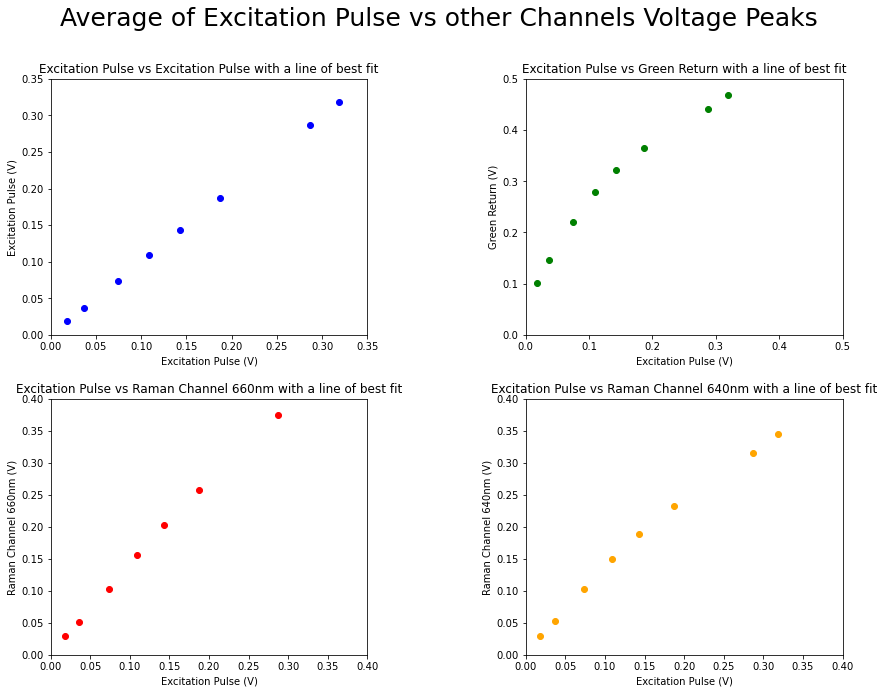

In [10]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_ExcitationPulse, c='blue')
a0, b0 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_ExcitationPulse, 1)
#ax1.plot(localMaxVoltage_ExcitationPulse, a0*np.array(localMaxVoltage_ExcitationPulse) + b0, color='steelblue', linestyle='--', linewidth=2)
ax1.set_title('Excitation Pulse vs Excitation Pulse with a line of best fit')
ax1.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Excitation Pulse (V)',xlim = (0,0.35), ylim = (0,0.35))

ax2.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_greenReturn, c='green')
a1, b1 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_greenReturn, 1)
#ax2.plot(localMaxVoltage_ExcitationPulse, a1*np.array(localMaxVoltage_ExcitationPulse) + b1, color='steelblue', linestyle='--', linewidth=2)
ax2.set_title('Excitation Pulse vs Green Return with a line of best fit')
ax2.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Green Return (V)', xlim = (0,0.5), ylim = (0, 0.5))

ax3.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_ramanChannel660nm, c='red')
a2, b2 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_ramanChannel660nm, 1)
#ax3.plot(localMaxVoltage_ExcitationPulse, a2*np.array(localMaxVoltage_ExcitationPulse) + b2, color='steelblue', linestyle='--', linewidth=2)
ax3.set_title('Excitation Pulse vs Raman Channel 660nm with a line of best fit')
ax3.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Raman Channel 660nm (V)',xlim = (0,0.4), ylim = (0,0.4))

ax4.scatter(localMaxVoltage_ExcitationPulse,localMaxVoltage_ramanChannel640nm, c='orange')
a3, b3 = np.polyfit(localMaxVoltage_ExcitationPulse, localMaxVoltage_ramanChannel640nm, 1)
#ax4.plot(localMaxVoltage_ExcitationPulse, a3*np.array(localMaxVoltage_ExcitationPulse) + b3, color='steelblue', linestyle='--', linewidth=2)
ax4.set_title('Excitation Pulse vs Raman Channel 640nm with a line of best fit')
ax4.set(xlabel = 'Excitation Pulse (V)', ylabel = 'Raman Channel 640nm (V)', xlim = (0,0.4), ylim = (0,0.4))

fig.suptitle('Average of Excitation Pulse vs other Channels Voltage Peaks', fontsize=25, x=0.64, y=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()

### Plotting with a focus on the noise before the signals

In [ ]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.plot(split_dataframes[0].index,split_dataframes[0].Excitation_Pulse, c='blue')
ax1.axhline(y = -0.00515, color = 'black')
ax1.set_title('Noise of Excitation Pulse before peak')
ax1.set(xlabel = 'Time (ns)', ylabel = 'Excitation Pulse Fluctuations (V)', xlim = (-100,-5), ylim = (-0.00555,-0.0047))

ax2.plot(split_dataframes[0].index,split_dataframes[0].Green_Return_532nm, c='green')
ax2.axhline(y = -0.0034, color = 'black')
ax2.set_title('Noise of Green Return before peak')
ax2.set(xlabel = 'Time (ns)', ylabel = 'Green Return Fluctuations (V)', xlim = (-100,-5), ylim = (-0.0038,-0.003))

ax3.plot(split_dataframes[0].index,split_dataframes[0].Raman_Channel_Detection_660nm, c='red')
ax3.axhline(y = -0.005745, color = 'black')
ax3.set_title('Noise of Raman Channel 660nm before peak')
ax3.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 660nm Fluctuations (V)', xlim = (-100,-5), ylim = (-0.006,-0.005405))

ax4.plot(split_dataframes[0].index,split_dataframes[0].Raman_Channel_Detection_640nm, c='orange')
ax4.axhline(y = -0.00969, color = 'black')
ax4.set_title('Noise of Raman Channel 640nm before peak')
ax4.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 640nm Fluctuations (V)', xlim = (-100,-5), ylim = (-0.0101,-0.0093))

fig.suptitle('Noise of all channels before peak - No Attenuation', fontsize=25, x = 0.65, y = 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()

In [ ]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Excitation_Pulse, c='blue')
ax1.axhline(y = -0.005155, color = 'black')
ax1.set_title('Noise of Excitation Pulse before peak')
ax1.set(xlabel = 'Time (ns)', ylabel = 'Excitation Pulse Fluctuations (V)', xlim = (-100,-5), ylim = (-0.00555,-0.0047))

ax2.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Green_Return_532nm, c='green')
ax2.axhline(y = -0.00347, color = 'black')
ax2.set_title('Noise of Green Return before peak')
ax2.set(xlabel = 'Time (ns)', ylabel = 'Green Return Fluctuations (V)', xlim = (-100,-5), ylim = (-0.0038,-0.003))

ax3.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Raman_Channel_Detection_660nm, c='red')
ax3.axhline(y = -0.005785, color = 'black')
ax3.set_title('Noise of Raman Channel 660nm before peak')
ax3.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 660nm Fluctuations (V)', xlim = (-100,-5), ylim = (-0.0061,-0.0055))

ax4.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Raman_Channel_Detection_640nm, c='orange')
ax4.axhline(y = -0.00969, color = 'black')
ax4.set_title('Noise of Raman Channel 640nm before peak')
ax4.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 640nm Fluctuations (V)', xlim = (-100,-5), ylim = (-0.0101,-0.0093))

fig.suptitle('Noise of all channels before peak - Max Attenuation', fontsize=25, x = 0.65, y = 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()

In [ ]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.plot(split_dataframes[0].index,split_dataframes[0].Excitation_Pulse, c='blue')
#ax1.axhline(y = -0.00515, color = 'black')
ax1.set_title('Noise of Excitation Pulse after peak')
ax1.set(xlabel = 'Time (ns)', ylabel = 'Excitation Pulse Fluctuations (V)', xlim = (25,100), ylim = (-0.00555,-0.0047))

ax2.plot(split_dataframes[0].index,split_dataframes[0].Green_Return_532nm, c='green')
#ax2.axhline(y = -0.0034, color = 'black')
ax2.set_title('Noise of Green Return after peak')
ax2.set(xlabel = 'Time (ns)', ylabel = 'Green Return Fluctuations (V)', xlim = (25,100), ylim = (-0.0002,-0.006))

ax3.plot(split_dataframes[0].index,split_dataframes[0].Raman_Channel_Detection_660nm, c='red')
#ax3.axhline(y = -0.005745, color = 'black')
ax3.set_title('Noise of Raman Channel 660nm after peak')
ax3.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 660nm Fluctuations (V)', xlim = (25,100), ylim = (-0.0081,-0.002))

ax4.plot(split_dataframes[0].index,split_dataframes[0].Raman_Channel_Detection_640nm, c='orange')
#ax4.axhline(y = -0.00969, color = 'black')
ax4.set_title('Noise of Raman Channel 640nm after peak')
ax4.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 640nm Fluctuations (V)', xlim = (25,100), ylim = (-0.0119,-0.005))

fig.suptitle('Noise of all channels after peak - No Attenuation', fontsize=25, x = 0.65, y = 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()

In [ ]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Excitation_Pulse, c='blue')
#ax1.axhline(y = -0.00515, color = 'black')
ax1.set_title('Noise of Excitation Pulse after peak')
ax1.set(xlabel = 'Time (ns)', ylabel = 'Excitation Pulse Fluctuations (V)', xlim = (25,100), ylim = (-0.0056,-0.0047))

ax2.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Green_Return_532nm, c='green')
#ax2.axhline(y = -0.0034, color = 'black')
ax2.set_title('Noise of Green Return after peak')
ax2.set(xlabel = 'Time (ns)', ylabel = 'Green Return Fluctuations (V)', xlim = (25,100), ylim = (-0.0042,-0.0025))

ax3.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Raman_Channel_Detection_660nm, c='red')
#ax3.axhline(y = -0.005745, color = 'black')
ax3.set_title('Noise of Raman Channel 660nm after peak')
ax3.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 660nm Fluctuations (V)', xlim = (25,100), ylim = (-0.0062,-0.0053))

ax4.plot(split_dataframes[len(split_dataframes)-1].index,split_dataframes[len(split_dataframes)-1].Raman_Channel_Detection_640nm, c='orange')
#ax4.axhline(y = -0.00969, color = 'black')
ax4.set_title('Noise of Raman Channel 640nm after peak')
ax4.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 640nm Fluctuations (V)', xlim = (25,100), ylim = (-0.0102,-0.00915))

fig.suptitle('Noise of all channels after peak - Max Attenuation', fontsize=25, x = 0.65, y = 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()

In [ ]:
#Code which calculates the FWHM
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find the full width at half maxima, we choose denominator to be 2
    #if we want full width at tenth maxima, we choose it to be 10 
    frac = 2
    d = Y - (max(Y) / frac) 
    #locate and subtract the 2 points in x axis (which is difference in time) for FWHM duration
    indexes = np.where(d > 0)[0]
    return abs(X[indexes[-1]] - X[indexes[0]])

In [ ]:
#Put all FWHM calculations of each channel and sample into a list
FWHM_exPulse = []
FWHM_gReturn = []
FWHM_r640Return = []
FWHM_r660Return = []

for i in range(len(split_dataframes)):
    FWHM_exPulse.append(FWHM(split_dataframes[i].index,split_dataframes[i].Excitation_Pulse))
    FWHM_gReturn.append(FWHM(split_dataframes[i].index,split_dataframes[i].Green_Return_532nm))    
    FWHM_r640Return.append(FWHM(split_dataframes[i].index,split_dataframes[i].Raman_Channel_Detection_640nm))    
    FWHM_r660Return.append(FWHM(split_dataframes[i].index,split_dataframes[i].Raman_Channel_Detection_660nm))    

In [ ]:
#Put all above lists into a single list and turn into a dataframe
FWHM_list = []

FWHM_list.append(FWHM_exPulse)
FWHM_list.append(FWHM_gReturn)
FWHM_list.append(FWHM_r640Return)
FWHM_list.append(FWHM_r660Return)

FWHM_Dataframe = pd.DataFrame(FWHM_list).transpose()
FWHM_Dataframe.columns = ['FWHM - Excitation Pulse', 'FWHM - Green Return', 'FWHM - Raman 640nm Channel', 'FWHM - Raman 660nm Channel']

FWHM_Dataframe

In [ ]:
print('Average FWHM for Excitation Pulse: ',np.average(FWHM_exPulse),'ns')
print('Average FWHM for Green Channel: ',np.average(FWHM_gReturn),'ns')
print('Average FWHM for Raman Channel 640nm: ',np.average(FWHM_r640Return),'ns')
print('Average FWHM for Raman Channel 660nm: ',np.average(FWHM_r660Return),'ns')

In [ ]:
plt.plot(split_dataframes[7].index,split_dataframes[7].Excitation_Pulse, c = 'orange', label = 'Max Attenuation')
plt.plot(split_dataframes[3].index,split_dataframes[3].Excitation_Pulse, c = 'red', label = 'Some Attenuation')
plt.plot(split_dataframes[0].index,split_dataframes[0].Excitation_Pulse, c = 'blue', label = 'No Attenuation')
plt.xlim(-2,5)
plt.title('Excitation Pulse with Increasing Attenuation')
plt.xlabel('Time (ns)')
plt.ylabel('Intensity (V)')
plt.legend()
plt.show()

In [ ]:
#Channel 1 vs other Channels Voltage Peaks
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax1.plot(split_dataframes[0].index,split_dataframes[0].Excitation_Pulse, c='blue')
#ax1.axhline(y = -0.00515, color = 'black')
ax1.set_title('Noise of Excitation Pulse after peak')
ax1.set(xlabel = 'Time (ns)', ylabel = 'Excitation Pulse Fluctuations (V)', xlim = (-25,75))

ax2.plot(split_dataframes[0].index,split_dataframes[0].Green_Return_532nm, c='green')
#ax2.axhline(y = -0.0034, color = 'black')
ax2.set_title('Noise of Green Return after peak')
ax2.set(xlabel = 'Time (ns)', ylabel = 'Green Return Fluctuations (V)', xlim = (-25,75))

ax3.plot(split_dataframes[0].index,split_dataframes[0].Raman_Channel_Detection_660nm, c='red')
#ax3.axhline(y = -0.005745, color = 'black')
ax3.set_title('Noise of Raman Channel 660nm after peak')
ax3.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 660nm Fluctuations (V)', xlim = (-25,75))

ax4.plot(split_dataframes[0].index,split_dataframes[0].Raman_Channel_Detection_640nm, c='orange')
#ax4.axhline(y = -0.00969, color = 'black')
ax4.set_title('Noise of Raman Channel 640nm after peak')
ax4.set(xlabel = 'Time (ns)', ylabel = 'Raman Channel 640nm Fluctuations (V)', xlim = (-25,75))

fig.suptitle('Noise of all channels after peak - No Attenuation', fontsize=25, x = 0.65, y = 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.5, hspace=0.25)
plt.show()